In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [5]:
base = pd.read_csv("../dataset/College.csv")

In [6]:
base.sample(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
109,Chestnut Hill College,Yes,342,254,126,25,64,518,232,10335,5015,700,850,71,71,8.3,29,7729,73
633,University of Maryland at College Park,No,14292,10315,3409,22,53,19340,3991,8723,5146,550,1550,89,92,18.1,12,9021,63
337,Manchester College,Yes,1004,802,239,23,63,909,51,10440,3850,525,1450,63,72,11.8,20,7940,64
377,Missouri Southern State College,No,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100
144,Columbia University,Yes,6756,1930,871,78,96,3376,55,18624,6664,550,300,97,98,5.9,21,30639,99


In [7]:
labels = base.Private
names = base['Unnamed: 0']
X_ = base.drop(columns=['Unnamed: 0', 'Private'])

In [8]:
# 1 --> No
# 0 --> Yes
oe = OrdinalEncoder(dtype=np.intc, categories=[['No', 'Yes']])
labels = oe.fit_transform(labels.to_numpy().reshape(-1,1))

In [9]:
X_.sample(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
41,807,707,308,39,63,1198,605,8840,2950,750,1290,74,82,13.1,31,6668,84
263,450,430,125,20,46,488,43,9950,3920,300,1300,76,76,11.8,25,9466,47
176,9274,6362,2435,14,44,13171,1687,7248,3240,500,1700,74,78,13.2,18,9002,58
763,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73


In [12]:
X_ = pd.DataFrame(MinMaxScaler().fit_transform(X_))

In [14]:
X_.shape

(777, 17)

In [17]:
pca = PCA(n_components=17)

In [18]:
principalComponents = pca.fit_transform(X_)

In [20]:
PCA_components = pd.DataFrame(principalComponents)

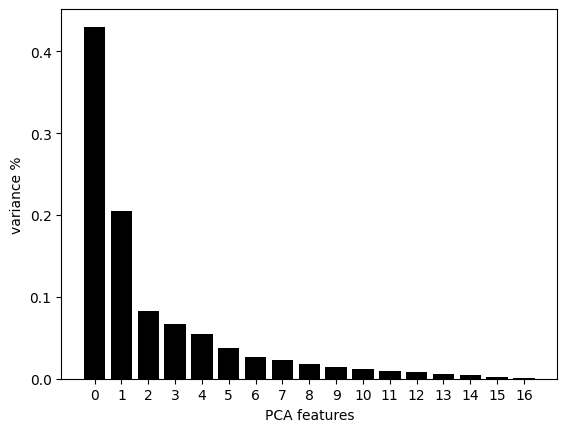

In [23]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

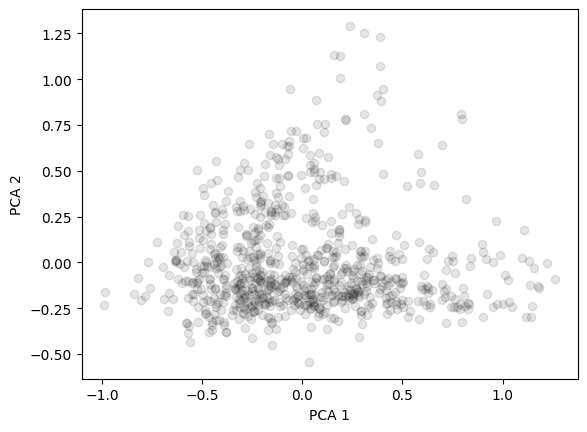

In [32]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

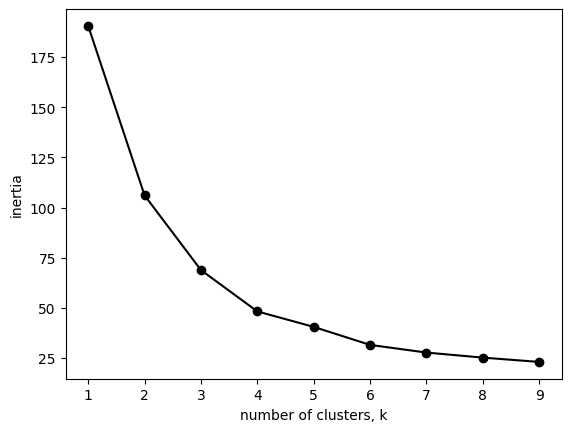

In [34]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init='auto')
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [51]:
principalComponents = pca.fit_transform(X_)
PCA_components = pd.DataFrame(principalComponents)

In [52]:
clusters = KMeans(n_clusters=3, n_init='auto').fit_predict(PCA_components)

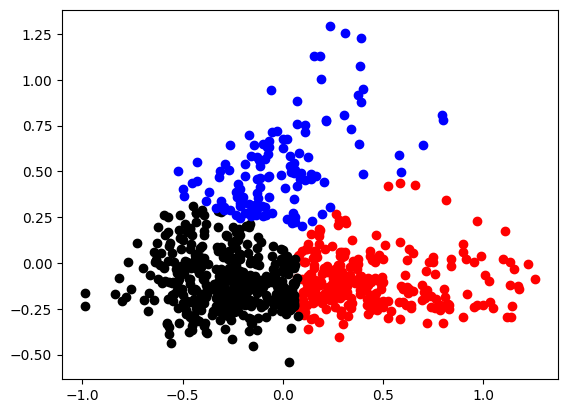

In [59]:
#filter rows of original data
cluster_0 = PCA_components[clusters == 0]
cluster_1 = PCA_components[clusters == 1]
cluster_2 = PCA_components[clusters == 2]
 
#Plotting the results
plt.scatter(cluster_0.loc[:,0] , cluster_0.loc[:,1] , color = 'red')
plt.scatter(cluster_1.loc[:,0] , cluster_1.loc[:,1] , color = 'black')
plt.scatter(cluster_2.loc[:,0] , cluster_2.loc[:,1] , color = 'blue')
plt.show()

In [71]:
clusters.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

In [73]:
confusion_matrix(labels, clusters.labels_)

array([[ 74, 138],
       [ 34, 531]], dtype=int64)